In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [43]:
df = pd.read_csv('/content/drive/MyDrive/customer_acquisition_data.csv')

In [ ]:
print(df.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


In [ ]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 800, Columns: 7


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB
None


In [44]:
print(df.describe())

       customer_id        cost  conversion_rate      revenue
count     800.0000  800.000000       800.000000   800.000000
mean      400.5000   13.148052         0.086305  2769.151250
std       231.0844    9.922337         0.059611  1259.543706
min         1.0000    5.246263         0.016341   500.000000
25%       200.7500    5.246263         0.043822  1694.000000
50%       400.5000    8.320327         0.043822  2764.000000
75%       600.2500    9.546326         0.123145  3824.250000
max       800.0000   30.450327         0.167592  4998.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB
None


In [53]:
X = pd.get_dummies(X, columns=['channel'], drop_first=True)

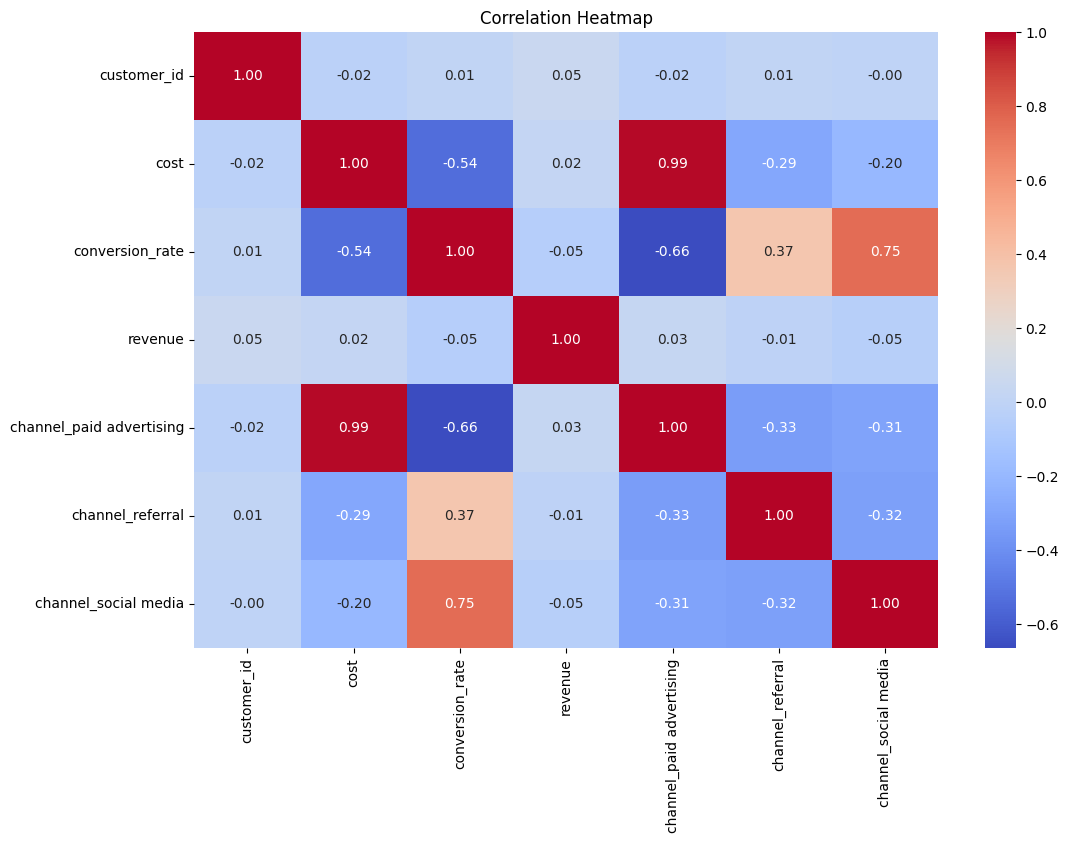

In [ ]:
# Calculate and visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [40]:
fig = px.histogram(df, x="cost", nbins=20, title='Distribution of Acquisition Cost')
fig.show()

fig = px.histogram(df, x="revenue", nbins=20, title='Distribution of Revenue')
fig.show()

compare the cost of acquisition across different **channels**


In [ ]:
cost_by_channel = df.groupby('channel')['cost'].mean().reset_index()

fig = px.bar(cost_by_channel,
             x='channel',
             y='cost',
             title='Customer Acquisition Cost by Channel')
fig.show()

In [ ]:
conversion_by_channel = df.groupby('channel')['conversion_rate'].mean().reset_index()

fig = px.bar(conversion_by_channel, x='channel',
             y='conversion_rate',
             title='Conversion Rate by Channel')
fig.show()

In [ ]:
revenue_by_channel = df.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channel,
             values='revenue',
             names='channel',
             title='Total Revenue by Channel',
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

Customer Lifetime Value by Channel


In [ ]:
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']

channel_cltv = df.groupby('channel')['cltv'].mean().reset_index()

fig = px.bar(channel_cltv, x='channel', y='cltv', color='channel',
             title='Customer Lifetime Value by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')

fig.show()

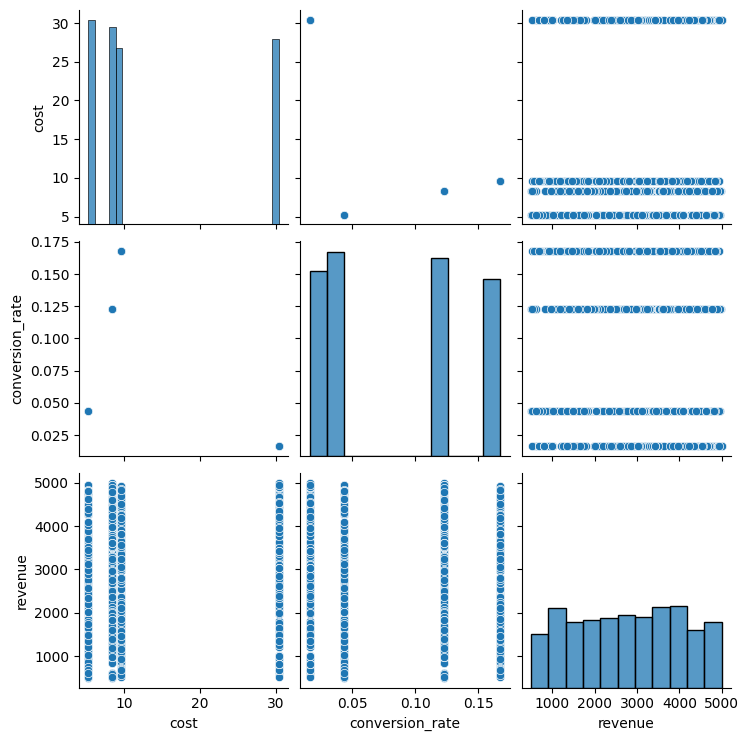

In [ ]:
  # prompt: pairplot to visualize relationship between subset of variables

  # Select a subset of variables for the pairplot
  subset_variables = ['cost','conversion_rate','revenue']  # Replace with your desired variables

  # Create a pairplot for the selected variables
  sns.pairplot(df[subset_variables])
  plt.show()

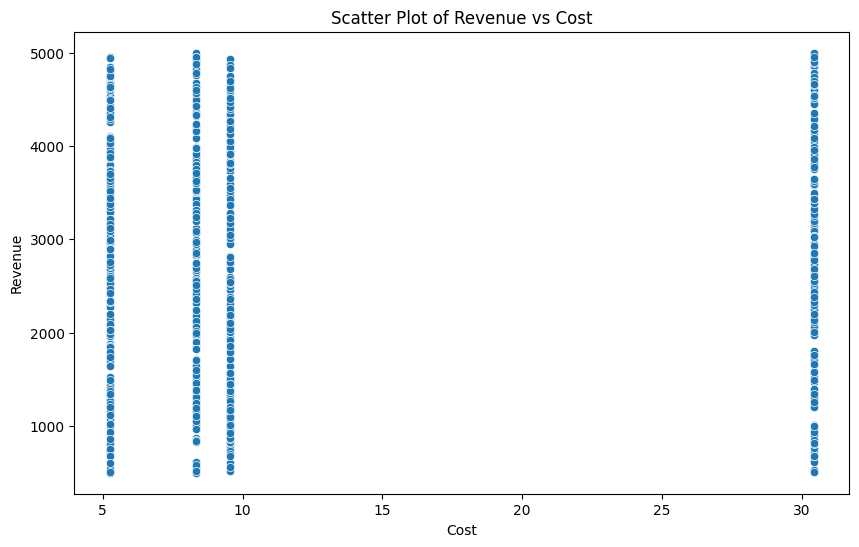

In [ ]:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='cost', y='revenue', data=df)
  plt.title('Scatter Plot of Revenue vs Cost')
  plt.xlabel('Cost')
  plt.ylabel('Revenue')
  plt.show()


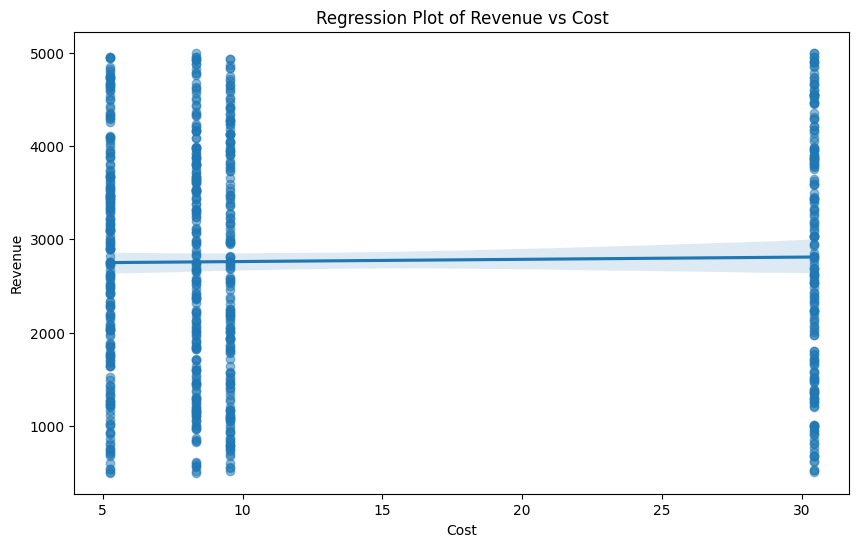

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='cost', y='revenue', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Revenue vs Cost')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()


In [54]:
# Feature Engineering
df['cost_per_acquisition'] = df['cost'] / df['conversion_rate']
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']


In [55]:
# Define the Target Variable and Features
X = df.drop(columns=['customer_id', 'revenue'])
y = df['revenue']

In [56]:
# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train, columns=['channel'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['channel'], drop_first=True)

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical features
categorical_features = ['channel']  # Replace with actual column names that are categorical
numerical_features = [col for col in X.columns if col not in categorical_features]

# Define the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # Encode categorical features
    ])

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [67]:
# Initialize and Train Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [68]:
# Train Models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [70]:
# Evaluate All Models
results = {}
for model in [lr_model, rf_model, gb_model]:
    mse, r2 = evaluate_model(model)
    results[model.__class__.__name__] = {'MSE': mse, 'R^2': r2}


In [71]:
# Print Results
results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE       R^2
LinearRegression           464496.275000  0.718162
RandomForestRegressor         329.712746  0.999800
GradientBoostingRegressor    4812.221865  0.997080


In [72]:
# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [73]:
# Hyperparameter Tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

In [74]:
# Best Models After Tuning
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [75]:
# Evaluate the Best Model
best_model = best_rf_model  # Select the best model based on evaluation
best_mse, best_r2 = evaluate_model(best_model)
print(f"Best Model: {best_model.__class__.__name__} - MSE: {best_mse:.2f}, R^2: {best_r2:.2f}")

Best Model: RandomForestRegressor - MSE: 396.26, R^2: 1.00


In [ ]:
# Make predictions using the best Random Forest model
final_predictions = best_rf_model.predict(X_test)

# Convert predictions to a DataFrame for better visualization
predictions_df = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': final_predictions})

# Display the predictions
print(predictions_df.head())


     Actual Revenue  Predicted Revenue
696            2857        2761.936621
667            1173        2669.457577
63             4131        2669.457577
533            2472        2761.936621
66             2529        2861.851222


In [78]:
 # Final Evaluation Metrics
final_predictions = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 14.33
Mean Squared Error: 396.26
R^2 Score: 1.00
